In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('auto-mpg.csv',na_values='?')
df.head()

df.dropna(inplace=True)
df.isna().value_counts()

df.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


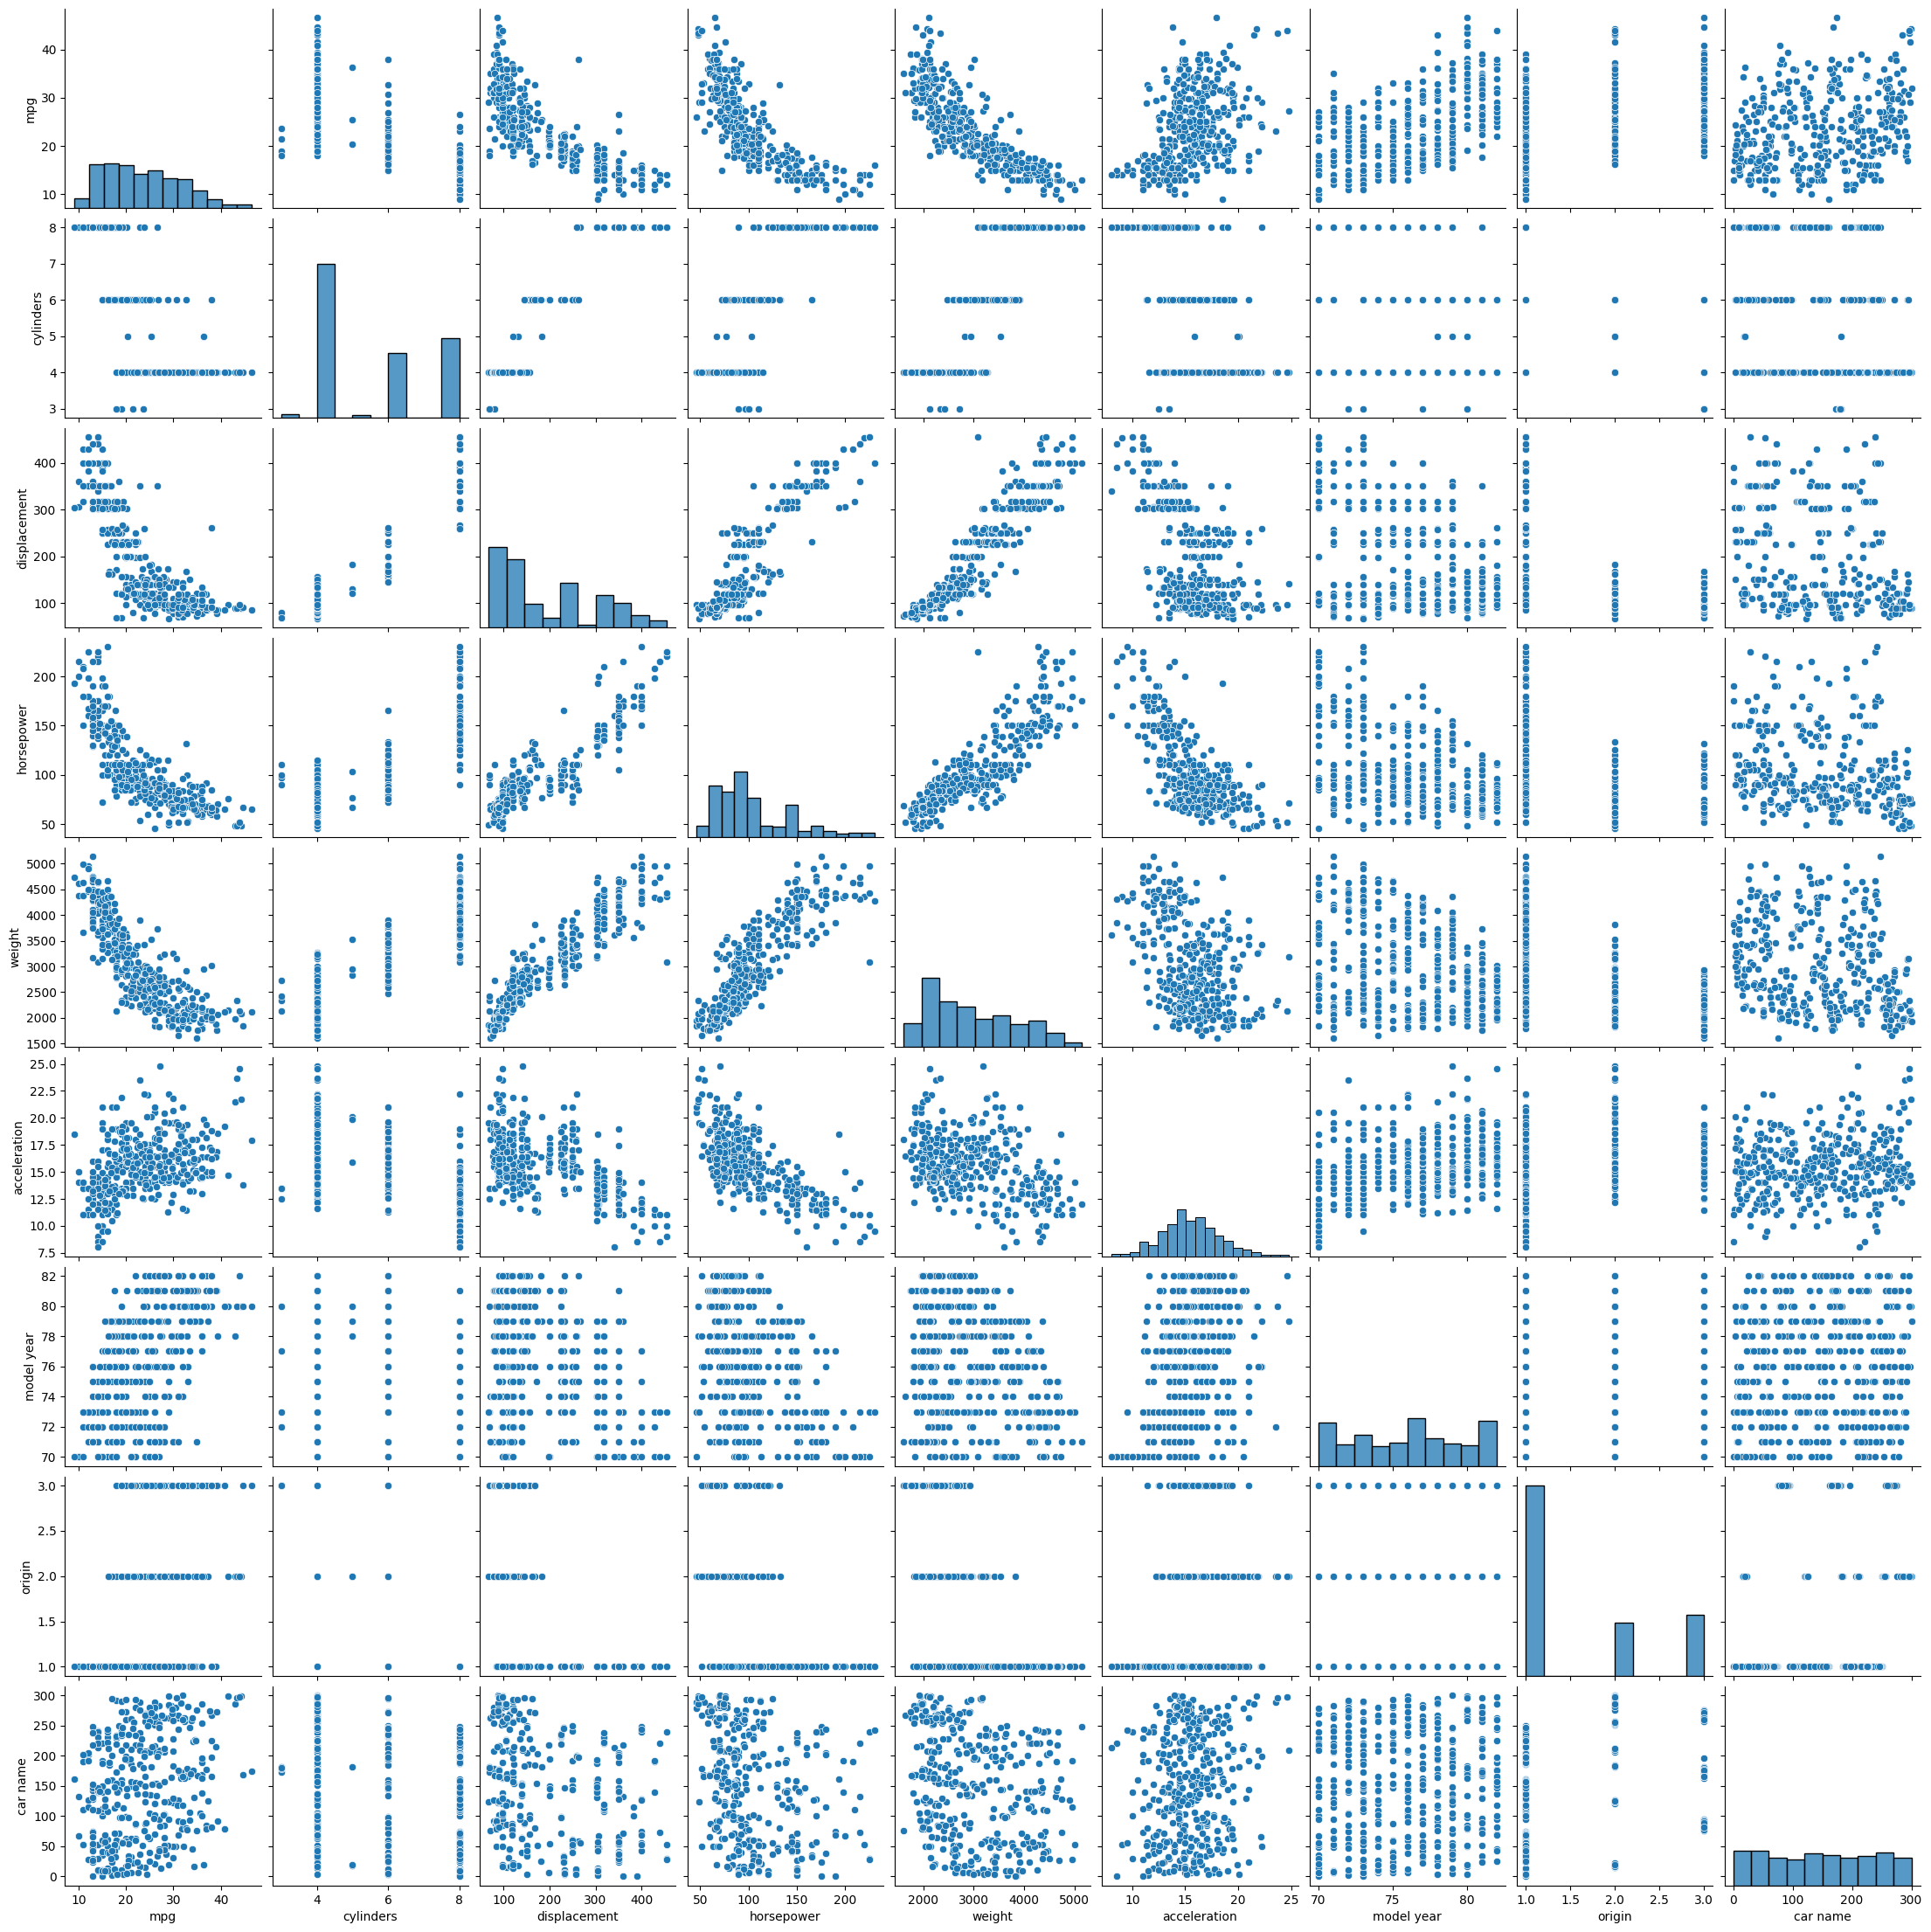

In [3]:
# Performing label encoding for car names
# Gives a label for the string values 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['car name'] = label.fit_transform(df['car name'])


sns.pairplot(df)
# plt.title(label="Relationship")
plt.show()

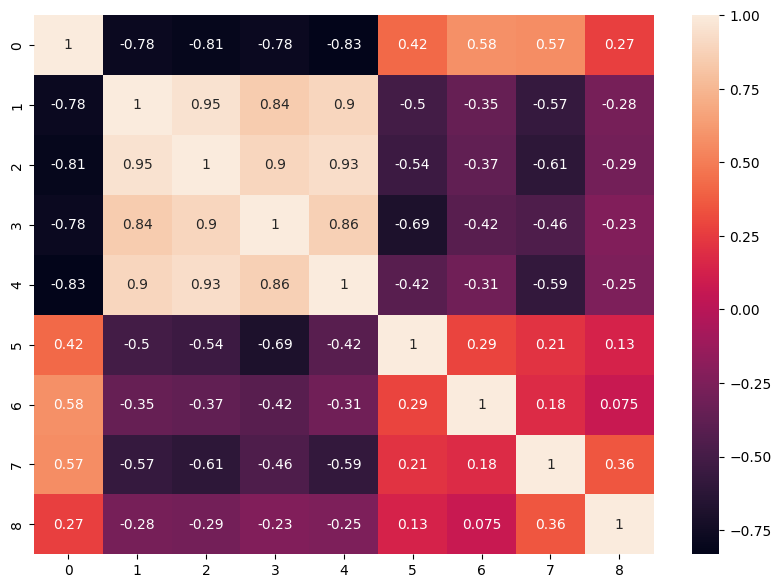

In [4]:
cm = np.corrcoef(df.values.T)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.show()


In [44]:
df_train = df.drop(columns=['car name'])
df_train
df_target = df['cylinders']
df_target
df_train.drop(columns=['cylinders'],inplace=True)
df_train


,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504,12.0,1
1,15.0,350.0,165.0,3693,11.5,1
2,18.0,318.0,150.0,3436,11.0,1
3,16.0,304.0,150.0,3433,12.0,1
4,17.0,302.0,140.0,3449,10.5,1
...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,1
394,44.0,97.0,52.0,2130,24.6,2
395,32.0,135.0,84.0,2295,11.6,1
396,28.0,120.0,79.0,2625,18.6,1


In [49]:
from sklearn.model_selection import train_test_split as tt 
xtrain,xtest,ytrain,ytest = tt(df_train,df_target,test_size=0.15)
# xtrain.shape
xtest.shape

(59, 6)

In [51]:
xtrain.describe()

,mpg,displacement,horsepower,weight,acceleration,origin
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,23.414715,192.506006,104.066066,2969.321321,15.563363,1.573574
std,7.674484,104.276769,38.147247,848.254776,2.701401,0.798054
min,9.000000,70.000000,46.000000,1613.000000,8.000000,1.000000
25%,17.500000,98.000000,75.000000,2220.000000,13.900000,1.000000
50%,23.000000,146.000000,92.000000,2800.000000,15.500000,1.000000
75%,29.000000,258.000000,120.000000,3613.000000,17.000000,2.000000
max,46.600000,455.000000,225.000000,4997.000000,24.800000,3.000000


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(xtrain)
x_test_std = sc.transform(xtest)
pd.DataFrame(x_train_std).describe()
# pd.DataFrame(x_train_std)


,0,1,2,3,4,5
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,-1.520305e-16,-1.066881e-17,-1.186905e-16,1.280257e-16,-6.187910e-16,-1.333601e-16
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-1.881092e+00,-1.176584e+00,-1.524447e+00,-1.601361e+00,-2.804006e+00,-7.197970e-01
25%,-7.718585e-01,-9.076636e-01,-7.630906e-01,-8.846976e-01,-6.166675e-01,-7.197970e-01
50%,-5.411945e-02,-4.466574e-01,-3.167784e-01,-1.999118e-01,-2.349104e-02,-7.197970e-01
75%,7.288686e-01,6.290237e-01,4.183241e-01,7.599690e-01,5.326119e-01,5.351370e-01
max,3.025634e+00,2.521070e+00,3.174958e+00,2.394010e+00,3.424347e+00,1.790071e+00


In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_std,ytrain)
lr_train_pred = lr.predict(x_train_std)
lr_test_pred = lr.predict(x_test_std)

from sklearn.metrics import mean_squared_error, r2_score 
print("Training results : for testing data")
print(f'MSE : {mean_squared_error(ytest,lr_test_pred)} ')
print(f"R^2 Score : {r2_score(ytest,lr_test_pred)} ")
print("\n\nTraining results : for training data")
print(f'MSE : {mean_squared_error(ytrain,lr_train_pred)} ')
print(f"R^2 Score : {r2_score(ytrain,lr_train_pred)} ")

Training results : for testing data
MSE : 0.37367169823914903 
R^2 Score : 0.8889385944697338 


Training results : for training data
MSE : 0.252607789655685 
R^2 Score : 0.910103963481379 
